In [425]:
#imports, make sure your python environment has all of these
import numpy as np
import matplotlib.pyplot as plt

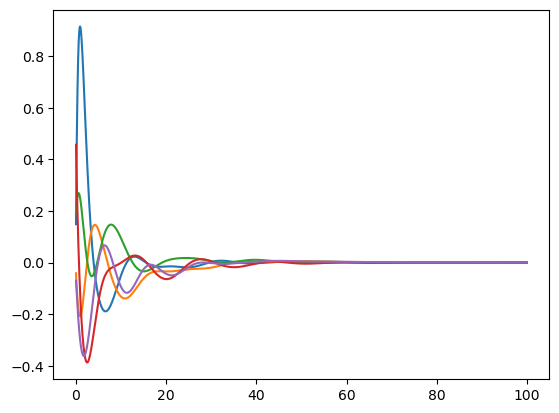

In [463]:
def hdds(N=100,g=1,T=100,dt=0.01,Jseed=42,r0seed=42):
    '''
    Creates model and returns results
    
    Args:
        N,      number of units/neurons.
        g,      coupling strength (used to create J).
        T,      length of time to run model for.
        dt,     time step length.
        Jseed,  seed to be used when creating coupling matrix.
        r0seed, seed to be used when definining initial states of the units/neurons.
    
    Returns:
        t,      an array of length T/dt, to use when plotting results.
        r,      an array of shape (N,T/dt) containing the time-domain results for each unit/neuron.
    
    # Example use:
    time, results = hdd()
    plt.plot(t, r[0,:])
    plt.plot(t, r[1,:]) #Plots only results for unit 0 and 1, but could be any
    '''
    
    #default parameters
    sigInitial = 0.3
    #setting parameters
    nSteps = int(np.ceil(T/dt))
    
    
    #Creating network
    r = np.zeros((N,nSteps))
    np.random.seed(Jseed)
    J = np.random.normal(0,g**2/np.sqrt(N),(N,N))
    J = J - np.diag(J)
    
    np.random.seed(r0seed)
    r[:, 0] = np.random.normal(0,sigInitial,N)
    t = np.zeros(nSteps)
    #iterate system
    for n in range(0,nSteps-1):
        r[:,n+1] = r[:, n] + (-r[:, n])*dt + np.matmul(J, np.tanh(r[:, n]))*dt
        t[n+1] = n*dt
    
    return t, r

t, r = hdds(N=100)

plt.plot(t, r[0,:])
plt.plot(t, r[1,:])
plt.plot(t, r[2,:])
plt.plot(t, r[3,:])
plt.plot(t, r[4,:])
plt.show()
